# Working with directed networks

In this notebook, we'll dive into the world of directed networks. Unlike simple networks where connections are just "there," directed networks are all about flow and influence. They capture relationships where the direction of the connection matters, such as a one-way street, a citation from one paper to another, different friendships or a follower on social media.

Understanding these networks is key to analyzing many real-world systems, from biological pathways to information flow on the web.

## What are directed networks?

A directed network, or directed graph, is a collection of nodes (or vertices) connected by edges that have a specific direction. Think of them as one-way streets, where you can travel from point $A$ to point $B$, but not necessarily back from $B$ to $A$.

This directionality is key to understanding many real-world systems. For example, a Twitter follower graph is a directed network: if person $A$ follows person $B$, it doesn't mean $B$ follows $A$ back. Similarly, a citation network is directed, with an arrow pointing from a citing paper to a cited one.

In a directed network, we can distinguish between two types of connections for a given node:

**In-degree:** The number of edges coming *into* a node.

**Out-degree:** The number of edges going *out* of a node.

In [1]:
import warnings
import matplotlib.pyplot as plt
import igraph as ig
ig.config["plotting.backend"] = "matplotlib"

In [2]:
def set_colors(style: dict, communities: ig.clustering.VertexClustering):
    colors_map = plt.colormaps["tab10"]
    colors = [colors_map(cluster) for cluster in communities.membership]
    style['vertex_color'] = colors
    return style

## How to create or load a directed graph?

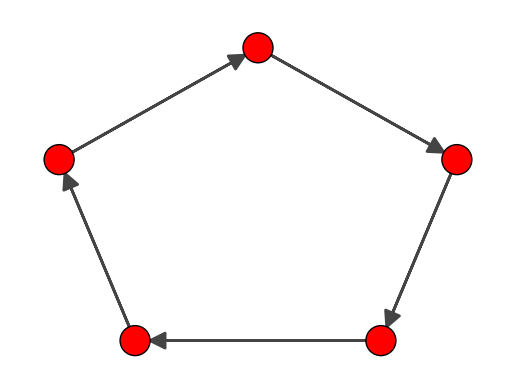

In [3]:
# Create an empty directed graph with 5 vertices
g = ig.Graph(directed=True)
g.add_vertices(5)

# Add edges (as pairs of vertex indices)
g.add_edges([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)])

# Plot the graph
ig.plot(g);

True


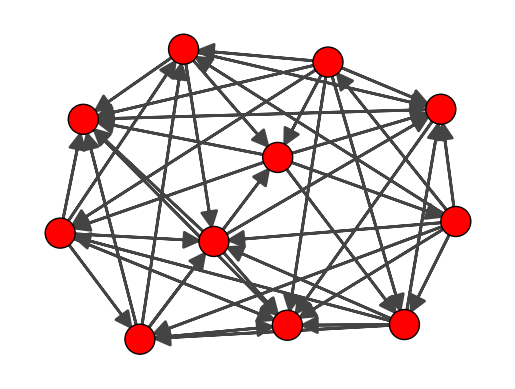

In [4]:
# Or load it from an existing file
graph_file = "../networks/football/football.gml"
g = ig.Graph.Read_GML(graph_file)

layout = g.layout("fr")
print(g.is_directed())
ig.plot(g, layout=layout);

## Visualizing directed graphs

In [5]:
# Since there are lots of nodes and directed edges in this graph, we can adjust the size of these properties:
style = {'layout': layout, 'vertex_size': 20, 'edge_width': 0.3, 'edge_arrow_size': 5, 'edge_arrow_width': 5}

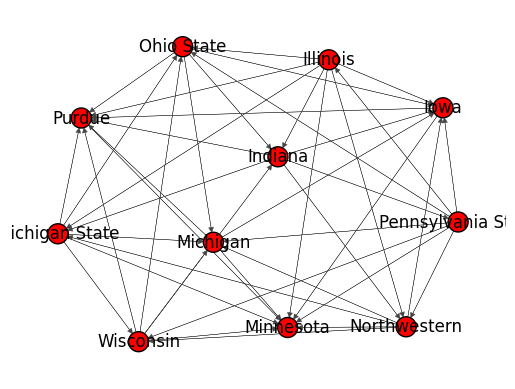

In [6]:
g.vs["label"] = g.vs["name"]
ig.plot(g, **style);

## Community detection - directed and undirected comparison

0.11157024793388431


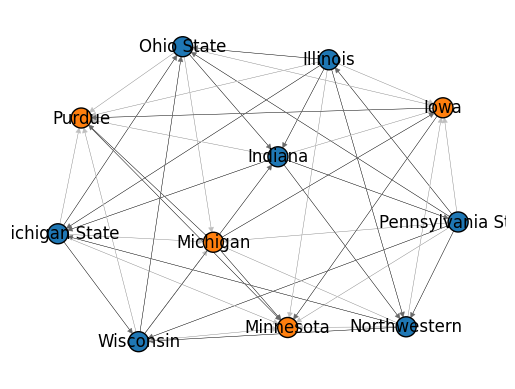

In [7]:
comms_dir_leiden = g.community_optimal_modularity()
style = set_colors(style, comms_dir_leiden)
ig.plot(comms_dir_leiden, **style);
print(comms_dir_leiden.modularity)

0.04132231404958675


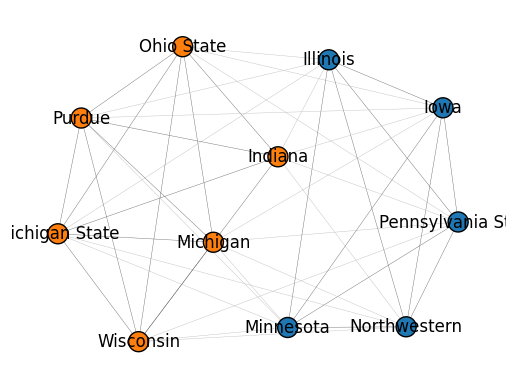

In [8]:
g_undirected = g.as_undirected(mode="each") 
comms_undir_leiden = g_undirected.community_optimal_modularity()
style = set_colors(style, comms_undir_leiden)
ig.plot(comms_undir_leiden, **style);
print(comms_undir_leiden.modularity)

0.0010330578512395515


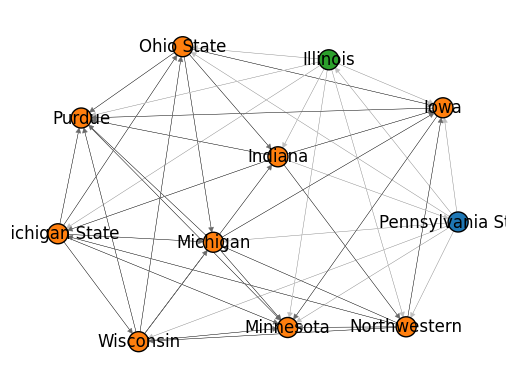

In [9]:
comms_dir_leiden = g.community_leiden(objective_function="modularity")
style = set_colors(style, comms_dir_leiden)
ig.plot(comms_dir_leiden, **style);
print(comms_dir_leiden.modularity)

0.04132231404958675


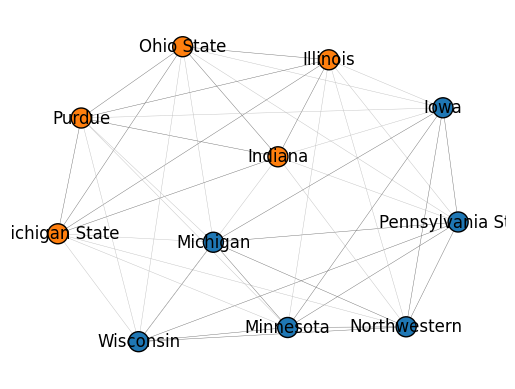

In [10]:
comms_undir_leiden = g_undirected.community_leiden(objective_function="modularity")
style = set_colors(style, comms_undir_leiden)
ig.plot(comms_undir_leiden, **style);
print(comms_undir_leiden.modularity)